In [27]:
import json
import csv
import pandas as pd
with open("C:/Users/Lakshya Agrawal/Downloads/archive/stations.json") as file:
    data2 = json.load(file)
data1 = data2['features']
with open('C:/Users/Lakshya Agrawal/Downloads/archive/Stations.csv','w') as file:
    csvfile = csv.writer(file)
    csvfile.writerow(['Coordinates','State','Code','Name','Zone','Address'])
    
    for data in data1:
        if(data['geometry'] == None):
            csvfile.writerow([None,data['properties']['state'],data['properties']['code'],data['properties']['name'],data['properties']['zone'],data['properties']['address']])
            continue
        else:
            csvfile.writerow([data['geometry']['coordinates'],data['properties']['state'],data['properties']['code'],data['properties']['name'],data['properties']['zone'],data['properties']['address']])



In [28]:
stations = pd.read_csv('C:/Users/Lakshya Agrawal/Downloads/archive/Stations.csv') # file view 
stations

,Coordinates,State,Code,Name,Zone,Address
0,"[75.4516454, 27.2520587]",Rajasthan,BDHL,Badhal,NWR,"Kishangarh Renwal, Rajasthan"
1,NaN,NaN,XX-BECE,XX-BECE,NaN,NaN
2,NaN,NaN,XX-BSPY,XX-BSPY,NaN,NaN
3,NaN,NaN,YY-BPLC,YY-BPLC,NaN,NaN
4,"[79.519746, 28.913427000000002]",Uttar Pradesh,KHH,KICHHA,NER,"Kichha, Uttar Pradesh"
...,...,...,...,...,...,...
8985,"[78.142621, 11.654084]",NaN,SAMT,SALEM MARKET,NaN,NaN
8986,"[78.04678001590001, 11.7385543]",NaN,OML,OMALUR,NaN,NaN
8987,"[77.979547, 11.761619]",NaN,TOS,TOLASAMPATTI,NaN,NaN
8988,"[77.921857, 11.804210999999999]",NaN,MCRD,MECHERI ROAD,NaN,NaN


In [29]:
stations = stations.dropna().drop(['Coordinates','Address'],axis = 1)

In [30]:
stations

,State,Code,Name,Zone
0,Rajasthan,BDHL,Badhal,NWR
4,Uttar Pradesh,KHH,KICHHA,NER
5,Rajasthan,SRKN,Sherekan,NWR
6,Rajasthan,BKKA,Bhukarka,NWR
7,Rajasthan,NHR,Nohar,NWR
...,...,...,...,...
6498,Maharashtra,WDLN,WADWAL NAGNATH,SCR
6500,Andhra Pradesh,TKBN,TSAKIBANDA,SWR
6501,Madhya Pradesh,KFY,KARAPGAON,WCR
6502,Madhya Pradesh,SXF,SOBHAPUR,WCR


In [31]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4213 entries, 0 to 6503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   4213 non-null   object
 1   Code    4213 non-null   object
 2   Name    4213 non-null   object
 3   Zone    4213 non-null   object
dtypes: object(4)
memory usage: 164.6+ KB


In [32]:
num_state =(stations['State'].value_counts())
num_state.head()

#there is UP stations is upto 529 simialar Raj,Maharshtra etc

Uttar Pradesh    523
Rajasthan        443
Gujarat          366
Maharashtra      346
West Bengal      332
Name: State, dtype: int64

In [33]:
stations.describe()

,State,Code,Name,Zone
count,4213,4213,4213,4213
unique,29,4213,4207,18
top,Uttar Pradesh,BDHL,Soron,NR
freq,523,1,2,584


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'Badhal'),
  Text(1, 0, 'KICHHA'),
  Text(2, 0, 'Sherekan'),
  Text(3, 0, 'Bhukarka'),
  Text(4, 0, 'Nohar'),
  Text(5, 0, 'Perungudi'),
  Text(6, 0, 'Khinaniyan'),
  Text(7, 0, 'DHODHAR'),
  Text(8, 0, 'Jayanagar Majilpur Halt'),
  Text(9, 0, 'NASIRABAD'),
  Text(10, 0, 'NIZAMABAD'),
  Text(11, 0, 'ADUTURAI'),
  Text(12, 0, 'KUMBAKONAM'),
  Text(13, 0, 'MANAMADURAI JN'),
  Text(14, 0, 'BARAUT'),
  Text(15, 0, 'Moga'),
  Text(16, 0, 'Rasheedpura Khori'),
  Text(17, 0, 'SAINAGAR SHIRDI'),
  Text(18, 0, 'DHOLA JN'),
  Text(19, 0, 'Jhunpa'),
  Text(20, 0, 'ASHAPURA GOMAT'),
  Text(21, 0, 'MOTIPURA CHAUKI'),
  Text(22, 0, 'DUDHNOI'),
  Text(23, 0, 'ITAUNJA'),
  Text(24, 0, 'Ramsar'),
  Text(25, 0, 'PILIBHIT JN'),
  Text(26, 0, 'Rampura Beri'),
  Text(27, 0, 'Ramgarh Shekhawati'),
  Text(28, 0, 'DHAMALGAON'),


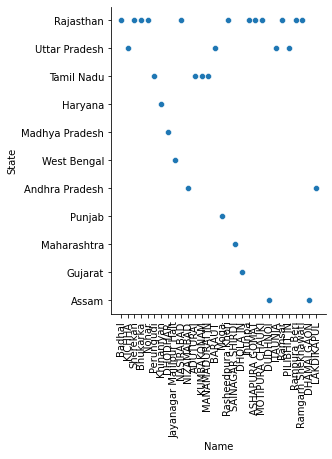

In [49]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.relplot(x="Name", y="State", data=stations[:30], kind="scatter")
plt.xticks(rotation =90)


In [19]:
dict_num_state = dict(num_state)
print(dict_num_state)

[{'Uttar Pradesh': 523, 'Rajasthan': 443, 'Gujarat': 366, 'Maharashtra': 346, 'West Bengal': 332, 'Madhya Pradesh': 312, 'Karnataka': 298, 'Tamil Nadu': 236, 'Punjab': 211, 'Andhra Pradesh': 202, 'Assam': 188, 'Bihar': 185, 'Haryana': 124, 'Kerala': 84, 'Orissa': 64, 'Jharkhand': 64, 'Chhattisgarh': 57, 'Himachal Pradesh': 51, 'Uttarakhand': 36, 'Delhi NCT': 28, 'Goa': 18, 'Tripura': 16, 'Jammu and Kashmir': 16, 'Nagaland': 4, 'Puducherry': 3, 'Odisha': 2, 'Chandigarh': 2, 'Mizoram': 1, 'Bangladesh': 1}]


In [88]:
stations[['State']]



,State
0,Rajasthan
1,NaN
2,NaN
3,NaN
4,Uttar Pradesh
...,...
8985,NaN
8986,NaN
8987,NaN
8988,NaN
